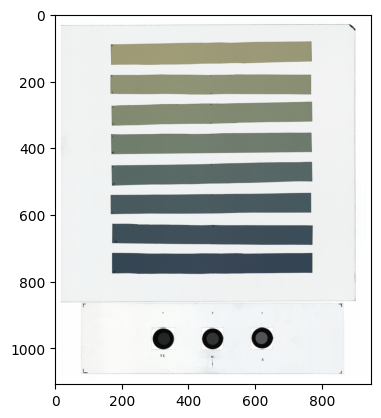

<Axes: >

In [ ]:
from Dosepy.image import load_multiples
from Dosepy.calibration import passed_QC, LUT
import logging

logging.basicConfig(
    format="{name} - {levelname} - {message} - {asctime}",
    style="{",
    datefmt="%Y-%m-%d %H:%M",
    level=logging.INFO,
    filename="tiff2dose_test.log",
    filemode="a",
    )

logger = logging.getLogger(__name__)

# Load the images

files = [
    "/media/luis/TOMO/Tiff Films/EBT4/6NOV24_CAL/CAL20241106_001.tif",
    "/media/luis/TOMO/Tiff Films/EBT4/6NOV24_CAL/CAL20241106_002.tif",
    "/media/luis/TOMO/Tiff Films/EBT4/6NOV24_CAL/CAL20241106_003.tif",
]

cal_image = load_multiples(files)
cal_image.plot()

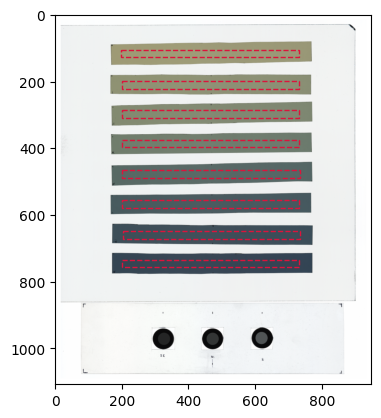

In [2]:
cal = LUT(cal_image)

cal.set_central_rois(size = (180, 8))
cal.set_doses([0, 0.5, 1, 2, 4, 6, 8, 10])

cal.plot_rois()

cal.set_beam_profile("/home/luis/Dosepy/tests/unit/fixtures/CAL/BeamProfile.csv")

cal.compute_lateral_lut(filter = 5)

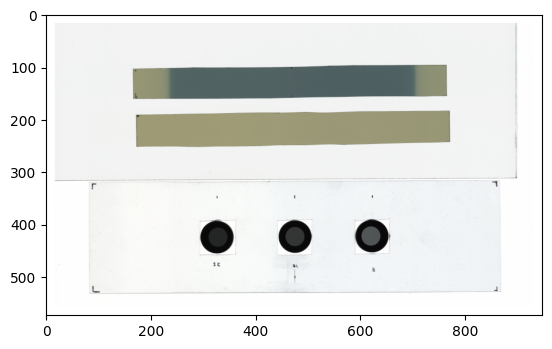

<Axes: >

In [3]:
# Load the images

files = [
    "/media/luis/TOMO/Tiff Films/EBT4/Verif 15x15/Ver_050dpi20241106_001.tif",
    "/media/luis/TOMO/Tiff Films/EBT4/Verif 15x15/Ver_050dpi20241106_002.tif",
    "/media/luis/TOMO/Tiff Films/EBT4/Verif 15x15/Ver_050dpi20241106_003.tif",
]

qa_image = load_multiples(files)
qa_image.plot()

In [4]:
from Dosepy.calibration import passed_QC

passed_QC(img=qa_image, lut=cal, rtol=0.01)  # Relative tolerance of 1%

Intensity of optical filter(s) in calibration.
([np.float64(9345.198660714286), np.float64(13275.963083604778), np.float64(20718.336886993602)],)
Intensity of optical filter(s) in the image.
[np.float64(9429.098324022347), np.float64(13383.234273318873), np.float64(20924.68770053476)]


True

In [5]:
from Dosepy.tiff2dose import Tiff2DoseM
import numpy as np

t2d = Tiff2DoseM()

dose = t2d.get_dose(
    img=qa_image,
    format="RP",
    lut=cal
    )

/home/luis/miniconda3/envs/dp/lib/python3.11/site-packages/Dosepy/tools/functions.py:19: RuntimeWarning: divide by zero encountered in power
  return a*x + b*x**n
/home/luis/miniconda3/envs/dp/lib/python3.11/site-packages/Dosepy/tools/functions.py:19: RuntimeWarning: invalid value encountered in power
  return a*x + b*x**n


In [6]:
dose_at_center = dose.array[110:140, 450:480]
dose_mean = np.mean(dose_at_center)

np.isclose(dose_mean, 5, rtol = 0.05)

np.True_

## Green Polynomial

In [7]:
dose = t2d.get_dose(
    img=qa_image,
    format="GP",
    lut=cal
    )

dose_at_center = dose.array[110:140, 450:480]
dose_mean = np.mean(dose_at_center)

np.isclose(dose_mean, 5, rtol = 0.05)

np.True_

In [9]:
dose_mean

np.float64(5.121342650404034)